In [16]:
import json, requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = requests.get('http://0.0.0.0:5000/weights/optimize').text
data = json.loads(x)

In [3]:
data

[{'allocations': {'BND': 0.10000000000000016,
   'SCHP': 0.0,
   'VEA': 0.4999999999999999,
   'VIG': 4.8352887737988165e-17,
   'VNQ': 0.25203691884061163,
   'VTEB': 0.0,
   'VTI': 0.0,
   'VWO': 0.14796308115938853,
   'XLE': 2.4801545294792605e-17},
  'return': -1.277767536731258e-15,
  'sharpe': -1.2483966885781115e-14,
  'volatility': 0.10235268552230774},
 {'allocations': {'BND': 1.0408340855860843e-17,
   'SCHP': 1.0408340855860843e-17,
   'VEA': 0.4976142082958132,
   'VIG': 0.0,
   'VNQ': 0.3712927155148389,
   'VTEB': 0.10000000000000005,
   'VTI': 0.031093076189347854,
   'VWO': 0.0,
   'XLE': 0.0},
  'return': 0.008888888891895317,
  'sharpe': 0.09083301452692717,
  'volatility': 0.09785967071763575},
 {'allocations': {'BND': 2.482822974991805e-17,
   'SCHP': 1.3444106938820255e-16,
   'VEA': 0.4006174535984722,
   'VIG': 2.3852447794681098e-18,
   'VNQ': 0.37134811542916374,
   'VTEB': 0.09999999999999988,
   'VTI': 0.1280344309723641,
   'VWO': 3.67544536472586e-17,
   '

In [4]:
stock_close = pd.read_pickle('stock_close.pickle')

In [5]:
stock_close.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
date,,,,,,,,,
1496725200000,124.93,41.94,41.20,82.71,65.98,82.10,55.72,51.63,93.39
1496811600000,125.07,41.91,41.17,83.29,65.05,81.99,55.53,51.59,93.52
1496898000000,125.29,41.85,41.25,83.09,64.86,81.93,55.52,51.53,93.57
1496984400000,125.19,41.70,40.97,83.67,66.42,81.86,55.43,51.47,93.75
1497243600000,125.17,41.57,40.82,84.42,66.89,81.84,55.36,51.43,93.82


In [34]:
seq = max(x['sharpe'] for x in data)
seq
new_allos = []
for i in data:
    max_sharpe = i['sharpe']
    if max_sharpe == seq:
        new_allos.append(i['allocations'])
new_allos

[{'BND': 1.2211568505617938e-16,
  'SCHP': 1.745578096439442e-17,
  'VEA': 3.34637246112311e-13,
  'VIG': 0.19387908262405226,
  'VNQ': 0.30612091737591196,
  'VTEB': 1.621438488620912e-14,
  'VTI': 0.5,
  'VWO': 9.886677609005747e-18,
  'XLE': 4.369810666591568e-13}]

In [7]:
for i in allos:
    for k,v in i.items():
        stock_close[k] *= v

In [8]:
stock_close.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
date,,,,,,,,,
1496725200000,31.2325,1.726420e-25,2.831500e-33,11.322921,0.0,3.886347e-29,1.811190e-31,8.415114e-29,1.500410
1496811600000,31.2675,1.725185e-25,2.829439e-33,11.402322,0.0,3.881140e-29,1.805014e-31,8.408594e-29,1.502499
1496898000000,31.3225,1.722715e-25,2.834937e-33,11.374942,0.0,3.878299e-29,1.804689e-31,8.398815e-29,1.503302
1496984400000,31.2975,1.716541e-25,2.815694e-33,11.454344,0.0,3.874986e-29,1.801763e-31,8.389035e-29,1.506194
1497243600000,31.2925,1.711189e-25,2.805385e-33,11.557018,0.0,3.874039e-29,1.799488e-31,8.382516e-29,1.507319


In [9]:
stock_close['total'] = stock_close.sum(axis=1)
stock_close['daily_return'] = stock_close['total'].pct_change(1)

In [11]:
stock_close.tail()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG,total,daily_return
date,,,,,,,,,,,
1559278800000,35.1725,1.639975e-25,2.793014e-33,11.895159,0.0,3.892974e-29,1.820941e-31,8.635149e-29,1.742365,48.810024,-0.008691
1559538000000,35.1025,1.646562e-25,2.809508e-33,11.923907,0.0,3.894867e-29,1.821266e-31,8.628629e-29,1.746543,48.772950,-0.000760
1559624400000,35.8900,1.667967e-25,2.810196e-33,11.870517,0.0,3.888240e-29,1.818341e-31,8.623739e-29,1.778996,49.539513,0.015717
1559710800000,36.1650,1.667144e-25,2.789578e-33,12.118304,0.0,3.888240e-29,1.818991e-31,8.618850e-29,1.800525,50.083829,0.010988
1559797200000,36.3675,1.674142e-25,2.788891e-33,12.141577,0.0,3.887293e-29,1.817691e-31,8.618850e-29,1.810968,50.320045,0.004716


In [13]:
stock_close['returns'] = stock_close['daily_return'].cumsum(axis=0)

In [20]:
stock_close.tail()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG,total,daily_return,returns
date,,,,,,,,,,,,
1559278800000,35.1725,1.639975e-25,2.793014e-33,11.895159,0.0,3.892974e-29,1.820941e-31,8.635149e-29,1.742365,48.810024,-0.008691,0.118220
1559538000000,35.1025,1.646562e-25,2.809508e-33,11.923907,0.0,3.894867e-29,1.821266e-31,8.628629e-29,1.746543,48.772950,-0.000760,0.117461
1559624400000,35.8900,1.667967e-25,2.810196e-33,11.870517,0.0,3.888240e-29,1.818341e-31,8.623739e-29,1.778996,49.539513,0.015717,0.133178
1559710800000,36.1650,1.667144e-25,2.789578e-33,12.118304,0.0,3.888240e-29,1.818991e-31,8.618850e-29,1.800525,50.083829,0.010988,0.144165
1559797200000,36.3675,1.674142e-25,2.788891e-33,12.141577,0.0,3.887293e-29,1.817691e-31,8.618850e-29,1.810968,50.320045,0.004716,0.148882


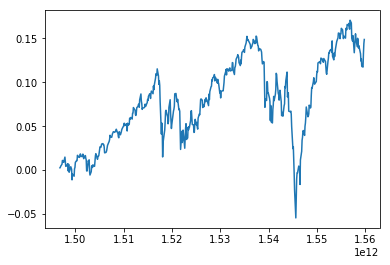

In [22]:
plt.plot(stock_close['returns'])